# Artificial Neural Network Atlas Data

In [32]:
#import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import KFold

from sklearn.preprocessing import LabelEncoder


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from keras.utils import np_utils
from tensorflow.keras import optimizers
%matplotlib inline

In [33]:
#load in data
data=pd.read_csv('ATLAS-data.csv', delimiter=',',header=None)
labels=pd.read_csv('ATLAS-labels.csv', delimiter=',',header=None)
print(data.shape)
print(data.head())
print(data.info())
print(data.describe())

(10000, 30)
        0       1        2        3      4        5      6      7       8   \
0  243.128  96.455  158.618   90.253  0.693   56.238  1.581  3.615  13.597   
1  139.751  74.028  111.619   44.266  2.119  104.723 -0.498  2.533   9.437   
2  116.217  73.136   59.239  101.850  0.625   85.539  2.979  1.922  28.049   
3   64.544   0.099   28.945  341.418  2.390  358.936 -1.181  0.714  35.293   
4   32.281  67.393   26.006   29.088  1.330  108.191 -0.362  0.846  48.389   

        9   ...     20       21   22       23     24     25      26     27  \
0  264.586  ...  2.121  376.410  3.0   46.248 -0.958 -0.444  42.759 -1.651   
1  168.638  ...  0.447  252.698  2.0   36.798  0.269 -1.254  31.816 -1.849   
2  202.636  ...  1.816  271.485  2.0   82.453  2.066 -1.210  58.216  1.442   
3  508.349  ... -2.409  470.806  3.0  331.152 -1.693  0.615  41.742  0.697   
4  152.087  ... -1.421  244.220  2.0   48.198  0.949  1.517  40.382 -0.382   

      28       29  
0 -1.445  157.638  
1  0.664  

In [3]:
#Check for missign values
total=data.isnull().sum().sort_values(ascending=False)
percent = round(data.isnull().sum().sort_values(ascending = False)/len(data)*100, 2)
pd.concat([total, percent], axis = 1,keys= ['Total', 'Percent'])


,Total,Percent
29,0,0.0
28,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
5,0,0.0
6,0,0.0
7,0,0.0
8,0,0.0


In [34]:
X=data
y=labels.values.ravel()

In [35]:
#Normalise the data between 0 and 1
sc=StandardScaler()
X_scaled_data = sc.fit_transform(data)

In [20]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled_data, y,test_size = 0.3, random_state=42)   #scale the test data as well
#Train Validation split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [51]:
#Build sequential model
model = Sequential()
model.add(Dense(300, input_dim=30, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(60, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.summary()


Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 300)               9300      
_________________________________________________________________
dropout_33 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 150)               45150     
_________________________________________________________________
dropout_34 (Dropout)         (None, 150)               0         
_________________________________________________________________
dense_50 (Dense)             (None, 60)                9060      
_________________________________________________________________
dropout_35 (Dropout)         (None, 60)                0         
_________________________________________________________________
dense_51 (Dense)             (None, 1)               

In [52]:
model.get_config()
model.get_weights()


[array([[ 0.07488914, -0.1338092 ,  0.07140493, ..., -0.1325856 ,
          0.05571657, -0.05869479],
        [-0.12876676, -0.05764055,  0.11146399, ...,  0.12456663,
         -0.12282806,  0.11847053],
        [ 0.02621631,  0.09973185, -0.07123175, ...,  0.11813001,
         -0.10123789, -0.12878993],
        ...,
        [ 0.10984147, -0.06065664,  0.04413953, ..., -0.10459988,
         -0.10396813, -0.11732882],
        [-0.04320851, -0.11093017, -0.11535189, ..., -0.00506765,
         -0.10157774, -0.09182393],
        [-0.02151667,  0.0282342 ,  0.01279376, ...,  0.02376939,
          0.02082328,  0.055732  ]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [53]:
#Compile and fit the model
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])
history=model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val),verbose=1)

Train on 7000 samples, validate on 2100 samples
Epoch 1/100
7000/7000 [==============================] - 2s 328us/sample - loss: 0.7009 - accuracy: 0.5311 - val_loss: 0.6483 - val_accuracy: 0.6657
Epoch 2/100
7000/7000 [==============================] - 1s 136us/sample - loss: 0.6549 - accuracy: 0.6111 - val_loss: 0.6126 - val_accuracy: 0.7024
Epoch 3/100
7000/7000 [==============================] - 1s 135us/sample - loss: 0.6215 - accuracy: 0.6653 - val_loss: 0.5871 - val_accuracy: 0.7176
Epoch 4/100
7000/7000 [==============================] - 1s 134us/sample - loss: 0.6092 - accuracy: 0.6789 - val_loss: 0.5692 - val_accuracy: 0.7214
Epoch 5/100
7000/7000 [==============================] - 1s 137us/sample - loss: 0.5893 - accuracy: 0.6977 - val_loss: 0.5557 - val_accuracy: 0.7257
Epoch 6/100
7000/7000 [==============================] - 1s 135us/sample - loss: 0.5809 - accuracy: 0.6989 - val_loss: 0.5461 - val_accuracy: 0.7267
Epoch 7/100
7000/7000 [==============================] - 1

# Validation of the model

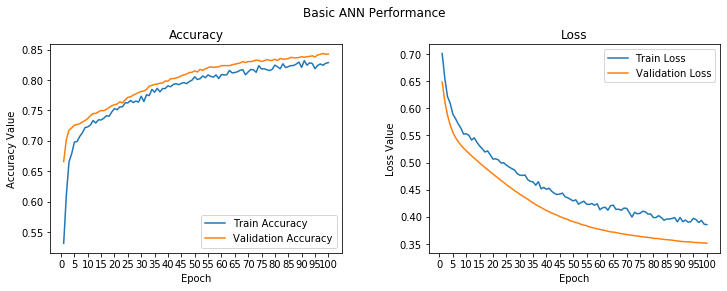

In [54]:
#Print out the statistics from the classifier
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic ANN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)
#Plotting accuracy Statistics according to epoch
epoch_list = list(range(1,101))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 101, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 101, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [55]:
y_pred = model.predict(X_test)
print(y_pred)

[[6.3462849e-03]
 [6.2538648e-01]
 [6.2539417e-01]
 ...
 [3.8253256e-05]
 [6.5517861e-01]
 [7.9389110e-02]]


In [56]:
score = model.evaluate(X_test, y_test,verbose=1)
print(score)

3000/3000 [==============================] - 0s 48us/sample - loss: 0.4142 - accuracy: 0.8167
[0.4142085426648458, 0.81666666]


In [57]:
print(confusion_matrix(y_test, y_pred.round()))
print(classification_report(y_test,y_pred.round()))

[[1311  230]
 [ 320 1139]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.83      1541
           1       0.83      0.78      0.81      1459

    accuracy                           0.82      3000
   macro avg       0.82      0.82      0.82      3000
weighted avg       0.82      0.82      0.82      3000



0.899715298407388


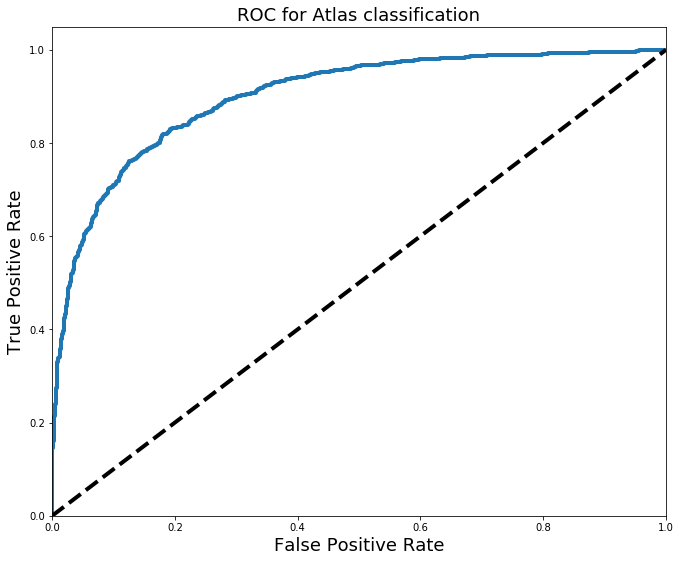

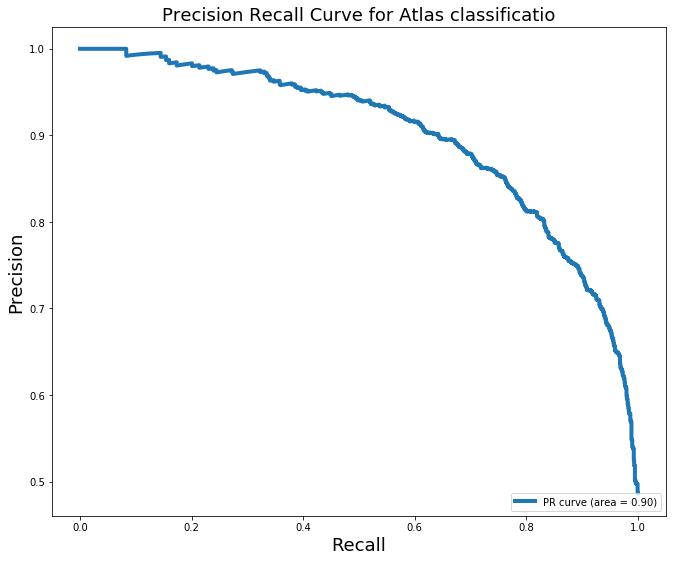

In [58]:
FPR, TPR, _ = roc_curve(y_test, y_pred)
ROC_AUC = auc(FPR, TPR)
print (ROC_AUC)

plt.figure(figsize =[11,9])
plt.plot(FPR, TPR, label= 'ROC curve(area = %0.2f)'%ROC_AUC, linewidth= 4)
plt.plot([0,1],[0,1], 'k--', linewidth = 4)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.title('ROC for Atlas classification', fontsize= 18)
plt.show()
#Precision recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
PR_AUC = auc(recall, precision)

plt.figure(figsize=[11,9])
plt.plot(recall, precision, label='PR curve (area = %0.2f)' % PR_AUC, linewidth=4)
plt.xlabel('Recall', fontsize=18)
plt.ylabel('Precision', fontsize=18)
plt.title('Precision Recall Curve for Atlas classificatio', fontsize=18)
plt.legend(loc="lower right")
plt.show()

# Artificial neural network Cross Validation

In [128]:
from tensorflow.keras import models
from tensorflow.keras import layers

def build_model():
    # Because we will need to instantiate
    # the same model multiple times,
    # we use a function to construct it.
    model = Sequential()
    model.add(Dense(300, input_dim=30, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(150, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(60, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])
    return model


In [129]:
#Repartition the normalised data
X_train, X_test, y_train, y_test = train_test_split(X_scaled_data, y,test_size = 0.3, random_state=42)

In [135]:
#Now with cross validation 10 fold
k = 4
num_val_samples = len(X_train) // k
num_epochs = 35
all_accuracy_history = []
for i in range(k):
    print('processing fold #', i+1)
    # Prepare the validation data: data from partition # k
    val_data = X_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [X_train[:i * num_val_samples],
         X_train[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [y_train[:i * num_val_samples],
         y_train[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model 
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=1)
    accuracy_history = history.history['accuracy']
    all_accuracy_history.append(accuracy_history)


processing fold # 1
Train on 5250 samples, validate on 1750 samples
Epoch 1/35
5250/5250 [==============================] - 17s 3ms/sample - loss: 0.6557 - accuracy: 0.6158 - val_loss: 0.5905 - val_accuracy: 0.6920
Epoch 2/35
5250/5250 [==============================] - 16s 3ms/sample - loss: 0.5853 - accuracy: 0.7040 - val_loss: 0.5911 - val_accuracy: 0.7023
Epoch 3/35
5250/5250 [==============================] - 16s 3ms/sample - loss: 0.5853 - accuracy: 0.7200 - val_loss: 0.6137 - val_accuracy: 0.7126
Epoch 4/35
5250/5250 [==============================] - 16s 3ms/sample - loss: 0.5888 - accuracy: 0.7253 - val_loss: 0.6200 - val_accuracy: 0.7177
Epoch 5/35
5250/5250 [==============================] - 16s 3ms/sample - loss: 0.5822 - accuracy: 0.7331 - val_loss: 0.6206 - val_accuracy: 0.7246
Epoch 6/35
5250/5250 [==============================] - 16s 3ms/sample - loss: 0.5777 - accuracy: 0.7434 - val_loss: 0.6062 - val_accuracy: 0.7326
Epoch 7/35
5250/5250 [============================

5250/5250 [==============================] - 17s 3ms/sample - loss: 0.4843 - accuracy: 0.8023 - val_loss: 0.4286 - val_accuracy: 0.8360
Epoch 21/35
5250/5250 [==============================] - 16s 3ms/sample - loss: 0.4827 - accuracy: 0.8015 - val_loss: 0.4282 - val_accuracy: 0.8366
Epoch 22/35
5250/5250 [==============================] - 17s 3ms/sample - loss: 0.5010 - accuracy: 0.8004 - val_loss: 0.4241 - val_accuracy: 0.8394
Epoch 23/35
5250/5250 [==============================] - 16s 3ms/sample - loss: 0.4751 - accuracy: 0.8076 - val_loss: 0.4264 - val_accuracy: 0.8383
Epoch 24/35
5250/5250 [==============================] - 17s 3ms/sample - loss: 0.4882 - accuracy: 0.8095 - val_loss: 0.4233 - val_accuracy: 0.8366
Epoch 25/35
5250/5250 [==============================] - 16s 3ms/sample - loss: 0.4771 - accuracy: 0.8122 - val_loss: 0.4230 - val_accuracy: 0.8411
Epoch 26/35
5250/5250 [==============================] - 16s 3ms/sample - loss: 0.4733 - accuracy: 0.8150 - val_loss: 0.4266

5250/5250 [==============================] - 16s 3ms/sample - loss: 0.5884 - accuracy: 0.7295 - val_loss: 0.5703 - val_accuracy: 0.7406
Epoch 5/35
5250/5250 [==============================] - 16s 3ms/sample - loss: 0.5883 - accuracy: 0.7347 - val_loss: 0.5654 - val_accuracy: 0.7469
Epoch 6/35
5250/5250 [==============================] - 16s 3ms/sample - loss: 0.5754 - accuracy: 0.7398 - val_loss: 0.5636 - val_accuracy: 0.7474
Epoch 7/35
5250/5250 [==============================] - 17s 3ms/sample - loss: 0.5747 - accuracy: 0.7486 - val_loss: 0.5541 - val_accuracy: 0.7560
Epoch 8/35
5250/5250 [==============================] - 16s 3ms/sample - loss: 0.5674 - accuracy: 0.7587 - val_loss: 0.5419 - val_accuracy: 0.7646
Epoch 9/35
5250/5250 [==============================] - 16s 3ms/sample - loss: 0.5457 - accuracy: 0.7596 - val_loss: 0.5346 - val_accuracy: 0.7640
Epoch 10/35
5250/5250 [==============================] - 16s 3ms/sample - loss: 0.5305 - accuracy: 0.7691 - val_loss: 0.5366 - va

In [136]:
average_accuracy_history = [
    np.mean([x[i] for x in all_accuracy_history]) for i in range(num_epochs)]

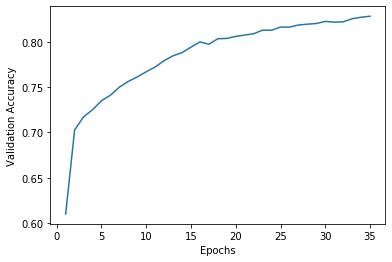

In [137]:
plt.plot(range(1, len(average_accuracy_history) + 1), average_accuracy_history)
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.show()

In [138]:
y_pred = model.predict(X_test)
print(y_pred)

[[3.5243775e-04]
 [6.8515289e-01]
 [7.2003996e-01]
 ...
 [3.5470327e-06]
 [8.1872892e-01]
 [2.0101283e-02]]


In [139]:
score = model.evaluate(X_test, y_test,verbose=1)
print(score)

3000/3000 [==============================] - 0s 107us/sample - loss: 0.5124 - accuracy: 0.8193
[0.5124305411974589, 0.8193333]


In [140]:
print(confusion_matrix(y_test, y_pred.round()))
print(classification_report(y_test,y_pred.round()))

[[1345  196]
 [ 346 1113]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.83      1541
           1       0.85      0.76      0.80      1459

    accuracy                           0.82      3000
   macro avg       0.82      0.82      0.82      3000
weighted avg       0.82      0.82      0.82      3000



0.8958057108444133


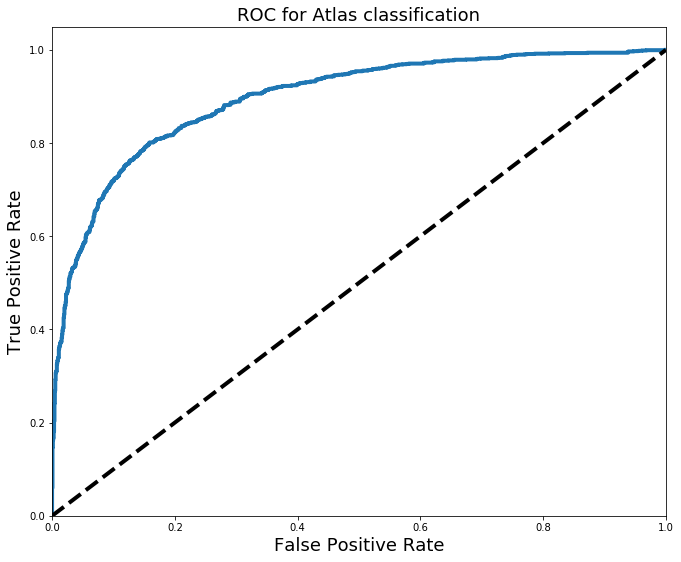

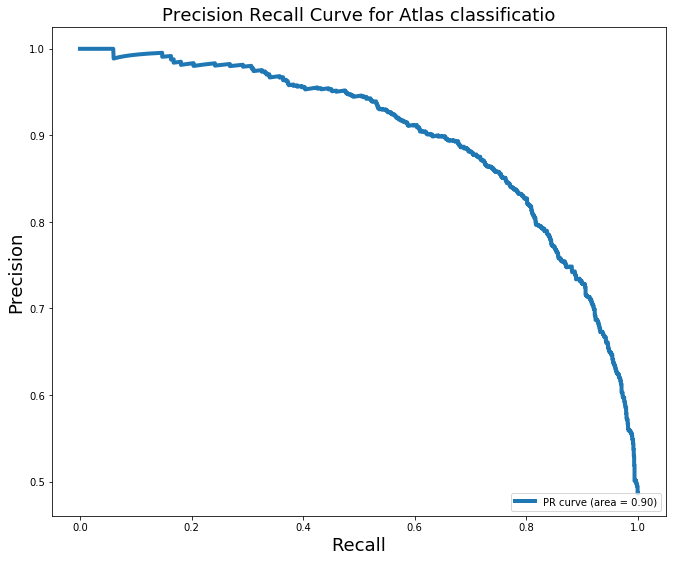

In [141]:
FPR, TPR, _ = roc_curve(y_test, y_pred)
ROC_AUC = auc(FPR, TPR)
print (ROC_AUC)

plt.figure(figsize =[11,9])
plt.plot(FPR, TPR, label= 'ROC curve(area = %0.2f)'%ROC_AUC, linewidth= 4)
plt.plot([0,1],[0,1], 'k--', linewidth = 4)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.title('ROC for Atlas classification', fontsize= 18)
plt.show()
#Precision recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
PR_AUC = auc(recall, precision)

plt.figure(figsize=[11,9])
plt.plot(recall, precision, label='PR curve (area = %0.2f)' % PR_AUC, linewidth=4)
plt.xlabel('Recall', fontsize=18)
plt.ylabel('Precision', fontsize=18)
plt.title('Precision Recall Curve for Atlas classificatio', fontsize=18)
plt.legend(loc="lower right")
plt.show()

# Stacked Neural networks

In [106]:
from os import makedirs
from numpy import dstack
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from numpy import argmax

In [76]:
#fit model on dataset using different holdout and validation samples
def fit_model(X,y):
    #Train test split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled_data, y,test_size = 0.3)   #scale the test data as well
    #Train Validation split
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3)
    #Build first sequential model
    model = Sequential()
    model.add(Dense(300, input_dim=30, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(150, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(60, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(1,activation='sigmoid'))
    model.summary()
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizers.RMSprop(lr=2e-5),
                  metrics=['accuracy'])
    callback = EarlyStopping(monitor='val_loss', patience=3)
    model.fit(X_train,y_train,epochs=100,callbacks=[callback],validation_data=(X_val, y_val), verbose=1)
    return model

In [77]:
# create directory for models
makedirs('models')
# fit and save models
n_members = 5
for i in range(n_members):
    # fit model
    model = fit_model(X, y)
    # save model
    filename = 'models/model_' + str(i + 1) + '.h5'
    model.save(filename)
    print('>Saved %s' % filename)

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_106 (Dense)            (None, 300)               9300      
_________________________________________________________________
dropout_77 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_107 (Dense)            (None, 150)               45150     
_________________________________________________________________
dropout_78 (Dropout)         (None, 150)               0         
_________________________________________________________________
dense_108 (Dense)            (None, 60)                9060      
_________________________________________________________________
dropout_79 (Dropout)         (None, 60)                0         
_________________________________________________________________
dense_109 (Dense)            (None, 1)               

Epoch 47/100
4900/4900 [==============================] - 1s 152us/sample - loss: 0.4859 - accuracy: 0.7665 - val_loss: 0.4688 - val_accuracy: 0.7686
Epoch 48/100
4900/4900 [==============================] - 1s 151us/sample - loss: 0.4832 - accuracy: 0.7671 - val_loss: 0.4667 - val_accuracy: 0.7724
Epoch 49/100
4900/4900 [==============================] - 1s 144us/sample - loss: 0.4831 - accuracy: 0.7724 - val_loss: 0.4647 - val_accuracy: 0.7738
Epoch 50/100
4900/4900 [==============================] - 1s 151us/sample - loss: 0.4800 - accuracy: 0.7704 - val_loss: 0.4629 - val_accuracy: 0.7752
Epoch 51/100
4900/4900 [==============================] - 1s 164us/sample - loss: 0.4751 - accuracy: 0.7757 - val_loss: 0.4612 - val_accuracy: 0.7762
Epoch 52/100
4900/4900 [==============================] - 1s 151us/sample - loss: 0.4714 - accuracy: 0.7753 - val_loss: 0.4594 - val_accuracy: 0.7771
Epoch 53/100
4900/4900 [==============================] - 1s 152us/sample - loss: 0.4711 - accuracy:

Train on 4900 samples, validate on 2100 samples
Epoch 1/100
4900/4900 [==============================] - 1s 280us/sample - loss: 0.6972 - accuracy: 0.5349 - val_loss: 0.6630 - val_accuracy: 0.6138
Epoch 2/100
4900/4900 [==============================] - 1s 135us/sample - loss: 0.6659 - accuracy: 0.5829 - val_loss: 0.6395 - val_accuracy: 0.6814
Epoch 3/100
4900/4900 [==============================] - 1s 144us/sample - loss: 0.6491 - accuracy: 0.6312 - val_loss: 0.6214 - val_accuracy: 0.7014
Epoch 4/100
4900/4900 [==============================] - 1s 147us/sample - loss: 0.6303 - accuracy: 0.6561 - val_loss: 0.6061 - val_accuracy: 0.7171
Epoch 5/100
4900/4900 [==============================] - 1s 141us/sample - loss: 0.6156 - accuracy: 0.6714 - val_loss: 0.5936 - val_accuracy: 0.7167
Epoch 6/100
4900/4900 [==============================] - 1s 154us/sample - loss: 0.6074 - accuracy: 0.6841 - val_loss: 0.5840 - val_accuracy: 0.7205
Epoch 7/100
4900/4900 [==============================] - 1

4900/4900 [==============================] - 1s 153us/sample - loss: 0.4450 - accuracy: 0.7959 - val_loss: 0.4510 - val_accuracy: 0.7886
Epoch 56/100
4900/4900 [==============================] - 1s 161us/sample - loss: 0.4497 - accuracy: 0.7908 - val_loss: 0.4494 - val_accuracy: 0.7929
Epoch 57/100
4900/4900 [==============================] - 1s 154us/sample - loss: 0.4493 - accuracy: 0.7890 - val_loss: 0.4481 - val_accuracy: 0.7924
Epoch 58/100
4900/4900 [==============================] - 1s 146us/sample - loss: 0.4390 - accuracy: 0.7947 - val_loss: 0.4470 - val_accuracy: 0.7933
Epoch 59/100
4900/4900 [==============================] - 1s 146us/sample - loss: 0.4416 - accuracy: 0.7943 - val_loss: 0.4455 - val_accuracy: 0.7948
Epoch 60/100
4900/4900 [==============================] - 1s 158us/sample - loss: 0.4424 - accuracy: 0.7949 - val_loss: 0.4449 - val_accuracy: 0.7948
Epoch 61/100
4900/4900 [==============================] - 1s 154us/sample - loss: 0.4406 - accuracy: 0.7969 - val

4900/4900 [==============================] - 1s 277us/sample - loss: 0.6977 - accuracy: 0.5396 - val_loss: 0.6657 - val_accuracy: 0.6229
Epoch 2/100
4900/4900 [==============================] - 1s 145us/sample - loss: 0.6777 - accuracy: 0.5708 - val_loss: 0.6438 - val_accuracy: 0.6810
Epoch 3/100
4900/4900 [==============================] - 1s 149us/sample - loss: 0.6568 - accuracy: 0.6090 - val_loss: 0.6252 - val_accuracy: 0.6967
Epoch 4/100
4900/4900 [==============================] - 1s 142us/sample - loss: 0.6406 - accuracy: 0.6324 - val_loss: 0.6091 - val_accuracy: 0.7100
Epoch 5/100
4900/4900 [==============================] - 1s 147us/sample - loss: 0.6310 - accuracy: 0.6455 - val_loss: 0.5955 - val_accuracy: 0.7124
Epoch 6/100
4900/4900 [==============================] - 1s 149us/sample - loss: 0.6169 - accuracy: 0.6671 - val_loss: 0.5831 - val_accuracy: 0.7143
Epoch 7/100
4900/4900 [==============================] - 1s 148us/sample - loss: 0.6123 - accuracy: 0.6753 - val_loss:

Epoch 56/100
4900/4900 [==============================] - 1s 142us/sample - loss: 0.4680 - accuracy: 0.7818 - val_loss: 0.4389 - val_accuracy: 0.7910
Epoch 57/100
4900/4900 [==============================] - 1s 148us/sample - loss: 0.4681 - accuracy: 0.7778 - val_loss: 0.4376 - val_accuracy: 0.7933
Epoch 58/100
4900/4900 [==============================] - 1s 152us/sample - loss: 0.4643 - accuracy: 0.7839 - val_loss: 0.4364 - val_accuracy: 0.7952
Epoch 59/100
4900/4900 [==============================] - 1s 152us/sample - loss: 0.4638 - accuracy: 0.7867 - val_loss: 0.4347 - val_accuracy: 0.7948
Epoch 60/100
4900/4900 [==============================] - 1s 156us/sample - loss: 0.4624 - accuracy: 0.7859 - val_loss: 0.4330 - val_accuracy: 0.7981
Epoch 61/100
4900/4900 [==============================] - 1s 147us/sample - loss: 0.4559 - accuracy: 0.7904 - val_loss: 0.4316 - val_accuracy: 0.7995
Epoch 62/100
4900/4900 [==============================] - 1s 148us/sample - loss: 0.4533 - accuracy:

4900/4900 [==============================] - 2s 415us/sample - loss: 0.7000 - accuracy: 0.5406 - val_loss: 0.6621 - val_accuracy: 0.6376
Epoch 2/100
4900/4900 [==============================] - 1s 145us/sample - loss: 0.6710 - accuracy: 0.5933 - val_loss: 0.6402 - val_accuracy: 0.6871
Epoch 3/100
4900/4900 [==============================] - 1s 143us/sample - loss: 0.6493 - accuracy: 0.6314 - val_loss: 0.6208 - val_accuracy: 0.7062
Epoch 4/100
4900/4900 [==============================] - 1s 135us/sample - loss: 0.6330 - accuracy: 0.6484 - val_loss: 0.6042 - val_accuracy: 0.7086
Epoch 5/100
4900/4900 [==============================] - 1s 144us/sample - loss: 0.6236 - accuracy: 0.6573 - val_loss: 0.5890 - val_accuracy: 0.7143
Epoch 6/100
4900/4900 [==============================] - 1s 146us/sample - loss: 0.6080 - accuracy: 0.6843 - val_loss: 0.5766 - val_accuracy: 0.7148
Epoch 7/100
4900/4900 [==============================] - 1s 141us/sample - loss: 0.5955 - accuracy: 0.6900 - val_loss:

Epoch 56/100
4900/4900 [==============================] - 1s 159us/sample - loss: 0.4433 - accuracy: 0.7898 - val_loss: 0.4248 - val_accuracy: 0.7971
Epoch 57/100
4900/4900 [==============================] - 1s 153us/sample - loss: 0.4403 - accuracy: 0.7929 - val_loss: 0.4235 - val_accuracy: 0.7962
Epoch 58/100
4900/4900 [==============================] - 1s 190us/sample - loss: 0.4419 - accuracy: 0.7894 - val_loss: 0.4225 - val_accuracy: 0.7981
Epoch 59/100
4900/4900 [==============================] - 1s 149us/sample - loss: 0.4429 - accuracy: 0.7951 - val_loss: 0.4210 - val_accuracy: 0.7995
Epoch 60/100
4900/4900 [==============================] - 1s 156us/sample - loss: 0.4431 - accuracy: 0.7871 - val_loss: 0.4201 - val_accuracy: 0.7986
Epoch 61/100
4900/4900 [==============================] - 1s 162us/sample - loss: 0.4413 - accuracy: 0.7965 - val_loss: 0.4188 - val_accuracy: 0.7995
Epoch 62/100
4900/4900 [==============================] - 1s 185us/sample - loss: 0.4394 - accuracy:

4900/4900 [==============================] - 2s 488us/sample - loss: 0.7060 - accuracy: 0.5049 - val_loss: 0.6775 - val_accuracy: 0.5881
Epoch 2/100
4900/4900 [==============================] - 1s 272us/sample - loss: 0.6803 - accuracy: 0.5661 - val_loss: 0.6541 - val_accuracy: 0.6576
Epoch 3/100
4900/4900 [==============================] - 1s 284us/sample - loss: 0.6598 - accuracy: 0.6049 - val_loss: 0.6341 - val_accuracy: 0.6910
Epoch 4/100
4900/4900 [==============================] - 1s 276us/sample - loss: 0.6378 - accuracy: 0.6396 - val_loss: 0.6153 - val_accuracy: 0.7033
Epoch 5/100
4900/4900 [==============================] - 1s 290us/sample - loss: 0.6266 - accuracy: 0.6645 - val_loss: 0.5993 - val_accuracy: 0.7129
Epoch 6/100
4900/4900 [==============================] - 1s 294us/sample - loss: 0.6113 - accuracy: 0.6782 - val_loss: 0.5848 - val_accuracy: 0.7143
Epoch 7/100
4900/4900 [==============================] - 1s 282us/sample - loss: 0.6012 - accuracy: 0.6906 - val_loss:

Epoch 56/100
4900/4900 [==============================] - 1s 295us/sample - loss: 0.4428 - accuracy: 0.7902 - val_loss: 0.4441 - val_accuracy: 0.7962
Epoch 57/100
4900/4900 [==============================] - 1s 292us/sample - loss: 0.4490 - accuracy: 0.7914 - val_loss: 0.4429 - val_accuracy: 0.7943
Epoch 58/100
4900/4900 [==============================] - 1s 268us/sample - loss: 0.4504 - accuracy: 0.7851 - val_loss: 0.4416 - val_accuracy: 0.7948
Epoch 59/100
4900/4900 [==============================] - 1s 289us/sample - loss: 0.4434 - accuracy: 0.7871 - val_loss: 0.4406 - val_accuracy: 0.7962
Epoch 60/100
4900/4900 [==============================] - 1s 283us/sample - loss: 0.4380 - accuracy: 0.7980 - val_loss: 0.4396 - val_accuracy: 0.7962
Epoch 61/100
4900/4900 [==============================] - 1s 287us/sample - loss: 0.4409 - accuracy: 0.7988 - val_loss: 0.4385 - val_accuracy: 0.7976
Epoch 62/100
4900/4900 [==============================] - 1s 289us/sample - loss: 0.4421 - accuracy:

In [98]:
# load models from file
def load_all_models(n_models):
    all_models = list()
    for i in range(n_models):
        # define filename for this ensemble
        filename = 'models/model_' + str(i + 1) + '.h5'
        # load model from file
        model = load_model(filename)
        # add to list of members
        all_models.append(model)
        print('>loaded %s' % filename)
    return all_models

In [144]:
# define stacked model from multiple member input models
def define_stacked_model(members):
    # update all layers in all models to not be trainable
    for i in range(len(members)):
        model = members[i]
        for layer in model.layers:
            # make not trainable
            layer.trainable = False
            # rename to avoid 'unique layer name' issue
            #layer.name = 'ensemble_' + str(i+1) + '_' + layer.name
    # define multi-headed input
    ensemble_visible = [model.input for model in members]
    # concatenate merge output from each model
    ensemble_outputs = [model.output for model in members]
    merge = concatenate(ensemble_outputs)
    hidden = Dense(60, activation='relu')(merge)
    output = Dense(2, activation='softmax')(hidden)
    model = Model(inputs=ensemble_visible, outputs=output)
    # plot graph of ensemble
    plot_model(model, show_shapes=True, to_file='model_graph.png')
    # compile
    model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5), metrics=['accuracy'])
    return model
# fit a stacked model
def fit_stacked_model(model, inputX, inputy):
    # prepare input data
    X = [inputX for _ in range(len(model.input))]
    # encode output data
    inputy_enc = to_categorical(inputy)
    # fit model
    model.fit(X, inputy_enc, epochs=100, verbose=1)
 
# make a prediction with a stacked model
def predict_stacked_model(model, inputX):
    # prepare input data
    X = [inputX for _ in range(len(model.input))]
    # make prediction
    return model.predict(X, verbose=1)

In [125]:
n_members = 5
members = load_all_models(n_members)
print('Loaded %d models' % len(members))
# define ensemble model
stacked_model = define_stacked_model(members)
# fit stacked model on test dataset
fit_stacked_model(stacked_model, X_val, y_val)
# make predictions and evaluate
ypred = predict_stacked_model(stacked_model, X_test)
ypred = argmax(ypred, axis=1)
acc = accuracy_score(y_test, ypred)
print('Stacked Test Accuracy: %.3f' % acc)

>loaded models/model_1.h5
>loaded models/model_2.h5
>loaded models/model_3.h5
>loaded models/model_4.h5
>loaded models/model_5.h5
Loaded 5 models
Train on 2100 samples
Epoch 1/100
2100/2100 [==============================] - 2s 968us/sample - loss: 0.6373 - accuracy: 0.4776
Epoch 2/100
2100/2100 [==============================] - 0s 154us/sample - loss: 0.6353 - accuracy: 0.5057
Epoch 3/100
2100/2100 [==============================] - 0s 165us/sample - loss: 0.6324 - accuracy: 0.5138
Epoch 4/100
2100/2100 [==============================] - 0s 170us/sample - loss: 0.6317 - accuracy: 0.5276
Epoch 5/100
2100/2100 [==============================] - 0s 151us/sample - loss: 0.6296 - accuracy: 0.5319
Epoch 6/100
2100/2100 [==============================] - 0s 161us/sample - loss: 0.6261 - accuracy: 0.5538
Epoch 7/100
2100/2100 [==============================] - 0s 135us/sample - loss: 0.6251 - accuracy: 0.5614
Epoch 8/100
2100/2100 [==============================] - 0s 155us/sample - loss: 0.

2100/2100 [==============================] - 0s 146us/sample - loss: 0.4947 - accuracy: 0.8100
Epoch 76/100
2100/2100 [==============================] - 0s 151us/sample - loss: 0.4916 - accuracy: 0.8086
Epoch 77/100
2100/2100 [==============================] - 0s 144us/sample - loss: 0.4915 - accuracy: 0.8090
Epoch 78/100
2100/2100 [==============================] - 0s 141us/sample - loss: 0.4919 - accuracy: 0.8000
Epoch 79/100
2100/2100 [==============================] - 0s 176us/sample - loss: 0.4876 - accuracy: 0.8067
Epoch 80/100
2100/2100 [==============================] - 0s 166us/sample - loss: 0.4849 - accuracy: 0.8152
Epoch 81/100
2100/2100 [==============================] - 0s 148us/sample - loss: 0.4841 - accuracy: 0.8081
Epoch 82/100
2100/2100 [==============================] - 0s 147us/sample - loss: 0.4821 - accuracy: 0.8186
Epoch 83/100
2100/2100 [==============================] - 0s 149us/sample - loss: 0.4789 - accuracy: 0.8114
Epoch 84/100
2100/2100 [=================

In [142]:
print(confusion_matrix(y_test, ypred.round()))
print(classification_report(y_test,ypred.round()))

[[1244  297]
 [ 238 1221]]
              precision    recall  f1-score   support

           0       0.84      0.81      0.82      1541
           1       0.80      0.84      0.82      1459

    accuracy                           0.82      3000
   macro avg       0.82      0.82      0.82      3000
weighted avg       0.82      0.82      0.82      3000



0.8220712897057758


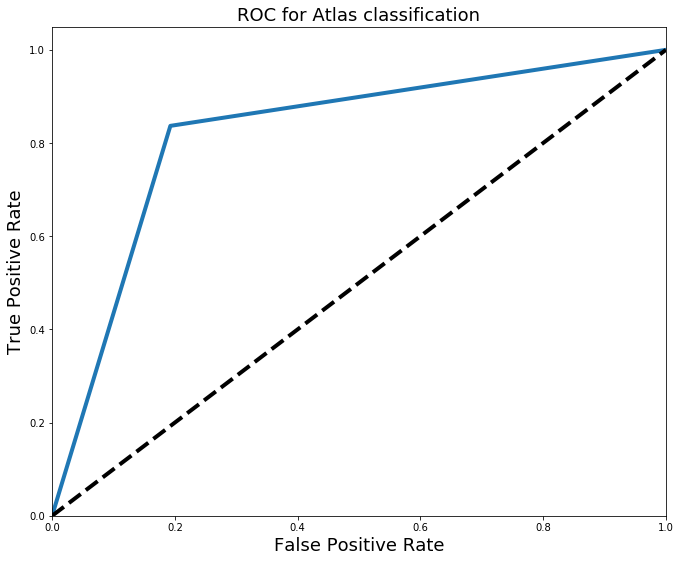

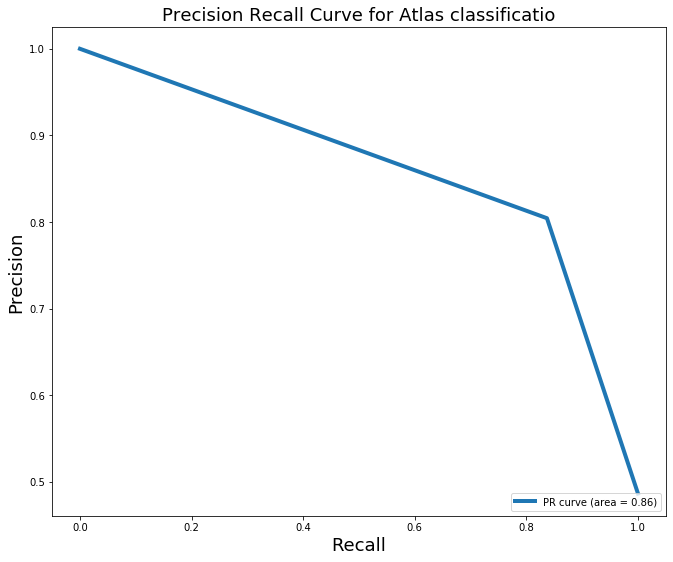

In [143]:
FPR, TPR, _ = roc_curve(y_test, ypred)
ROC_AUC = auc(FPR, TPR)
print (ROC_AUC)

plt.figure(figsize =[11,9])
plt.plot(FPR, TPR, label= 'ROC curve(area = %0.2f)'%ROC_AUC, linewidth= 4)
plt.plot([0,1],[0,1], 'k--', linewidth = 4)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.title('ROC for Atlas classification', fontsize= 18)
plt.show()
#Precision recall curve
precision, recall, _ = precision_recall_curve(y_test, ypred)
PR_AUC = auc(recall, precision)

plt.figure(figsize=[11,9])
plt.plot(recall, precision, label='PR curve (area = %0.2f)' % PR_AUC, linewidth=4)
plt.xlabel('Recall', fontsize=18)
plt.ylabel('Precision', fontsize=18)
plt.title('Precision Recall Curve for Atlas classification', fontsize=18)
plt.legend(loc="lower right")
plt.show()